## Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import unique
import seaborn as sns
from scipy.stats import boxcox
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering
from scipy.cluster.hierarchy import linkage,cut_tree, dendrogram
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

## Data Loading

In [3]:
# To upload data
from google.colab import files
data = files.upload()

# Read csv data
data = pd.read_csv("mall_customers_dataset.csv", skiprows=1,sep=';')
print(data.head())


Saving mall_customers_dataset.csv to mall_customers_dataset.csv
   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)
0           1    Male   19              15000                      39
1           2    Male   21              15000                      81
2           3  Female   20              16000                       6
3           4  Female   23              16000                      77
4           5  Female   31              17000                      40


## **EDA**

In [4]:
## Checking Data Types and Counts
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income ($)       200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [5]:
## Checking Summary statistics for the data
print(data.describe())

       CustomerID         Age  Annual Income ($)  Spending Score (1-100)
count  200.000000  200.000000         200.000000              200.000000
mean   100.500000   38.850000       60560.000000               50.200000
std     57.879185   13.969007       26264.721165               25.823522
min      1.000000   18.000000       15000.000000                1.000000
25%     50.750000   28.750000       41500.000000               34.750000
50%    100.500000   36.000000       61500.000000               50.000000
75%    150.250000   49.000000       78000.000000               73.000000
max    200.000000   70.000000      137000.000000               99.000000


### Data Distribution Basis Gender

In [6]:
## Checking distribution basis gender
print(data['Gender'].value_counts())

Gender
Female    112
Male       88
Name: count, dtype: int64


In [7]:
## Checking Summary statistics for Males
print(data[data["Gender"] == "Male"].describe())

       CustomerID        Age  Annual Income ($)  Spending Score (1-100)
count   88.000000  88.000000          88.000000               88.000000
mean   104.238636  39.806818       62227.272727               48.511364
std     57.483830  15.514812       26638.373182               27.896770
min      1.000000  18.000000       15000.000000                1.000000
25%     59.500000  27.750000       45500.000000               24.500000
50%    106.500000  37.000000       62500.000000               50.000000
75%    151.250000  50.500000       78000.000000               70.000000
max    200.000000  70.000000      137000.000000               97.000000


<Axes: ylabel='Frequency'>

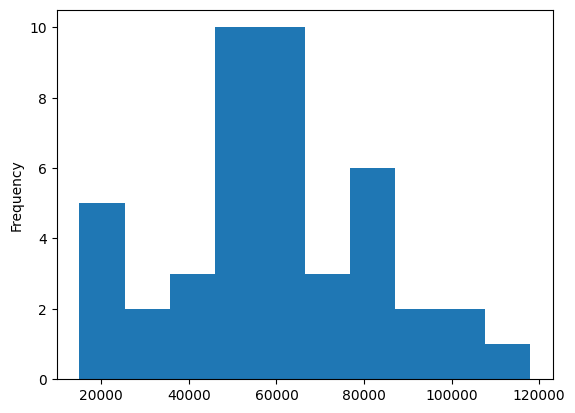

In [8]:
## Checking distribution of Annual Income for Males
data[data["Gender"] == "Male"].groupby('Age')["Annual Income ($)"].mean().plot(kind="hist")

In [9]:
## Checking Summary statistics for Females
print(data[data["Gender"] == "Female"].describe())

       CustomerID         Age  Annual Income ($)  Spending Score (1-100)
count  112.000000  112.000000         112.000000              112.000000
mean    97.562500   38.098214       59250.000000               51.526786
std     58.276412   12.644095       26011.951515               24.114950
min      3.000000   18.000000       16000.000000                5.000000
25%     46.750000   29.000000       39750.000000               35.000000
50%     94.500000   35.000000       60000.000000               50.000000
75%    148.250000   47.500000       77250.000000               73.000000
max    197.000000   68.000000      126000.000000               99.000000


<Axes: ylabel='Frequency'>

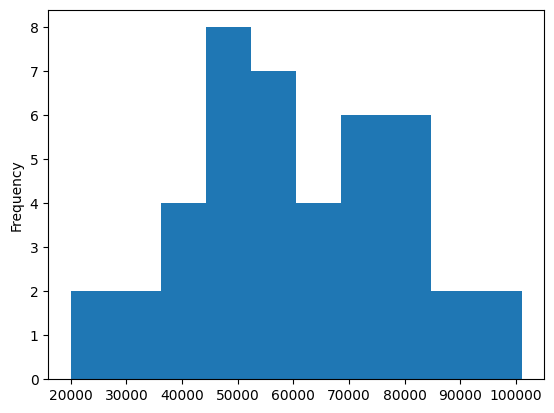

In [10]:
## Checking distribution of Annual Income for Females
data[data["Gender"] == "Female"].groupby('Age')["Annual Income ($)"].mean().plot(kind="hist")

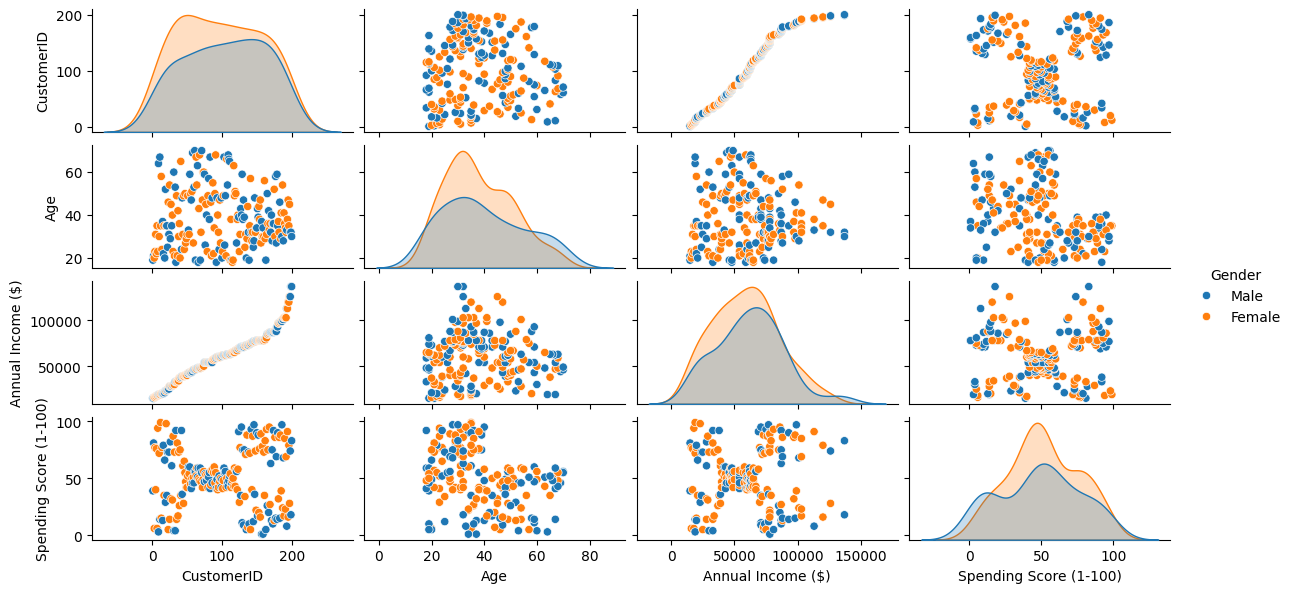

In [11]:
## Visualize Relationship between variables basis gender
sns.pairplot(data, hue='Gender', aspect=2, height=1.5)

## Distribution for Numeric variables

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

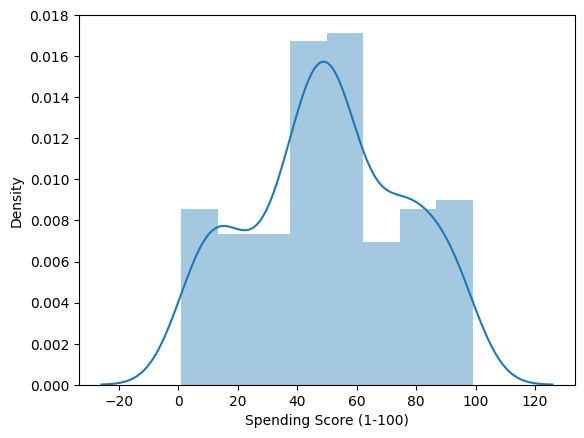

In [12]:
## Visualize the distribution for Spending Score
sns.distplot(data['Spending Score (1-100)'])

<Axes: xlabel='Annual Income ($)', ylabel='Density'>

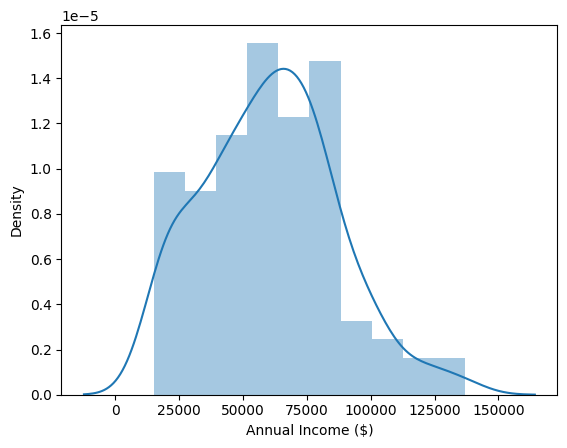

In [13]:
## Visualize the distribution for Annual Income
sns.distplot(data['Annual Income ($)'])

<Axes: xlabel='Age', ylabel='Density'>

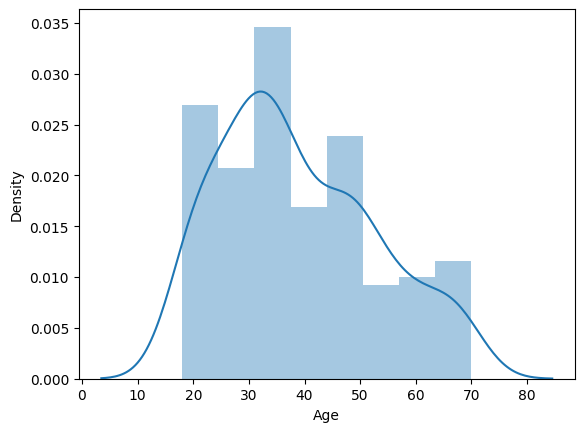

In [14]:
## Visualize the distribution for Age
sns.distplot(data['Age'])

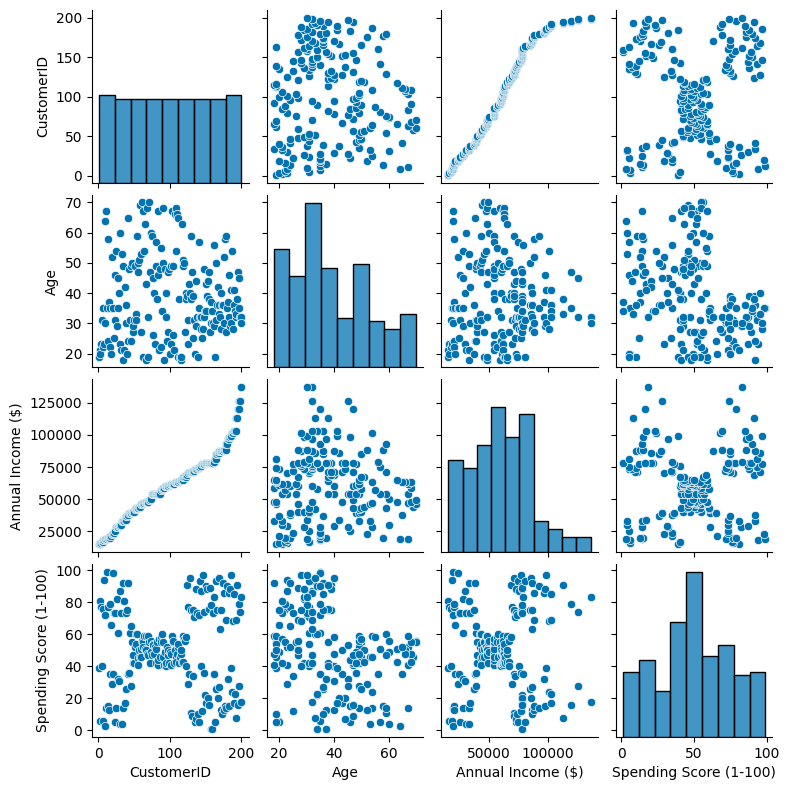

In [15]:
## Visualize Relationship between variables
sns.set_palette('colorblind')
sns.pairplot(data=data, height=2)

## **Data Preprocessing**

### Removing Outliers

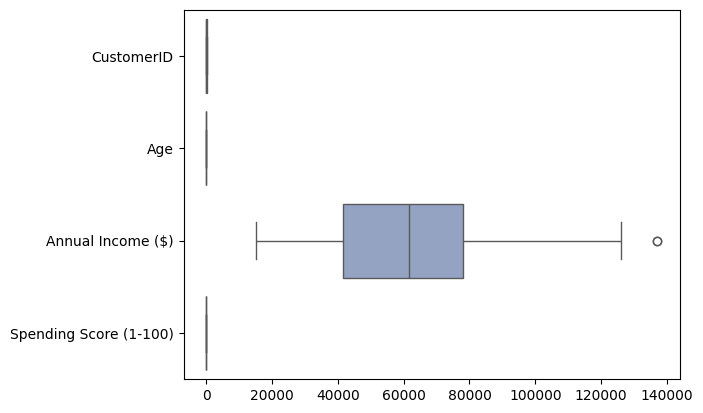

In [16]:
## Visualising the outliers
ax = sns.boxplot(data=data, orient="h", palette="Set2")

We can see there are outliers just for Annual Income ($). To further investigate we will check the values above 99 percentile and validate from the chart above if these are outliers.

In [17]:
## Checking the values at 99 Percentile
print(data['Annual Income ($)'].quantile(0.99))

126109.9999999999


In [18]:
## Remove the values above 99 Percentile as they are outliers
print(len(data[data['Annual Income ($)']>126109.99])*100/len(data))

1.0


Given the outliers form only 1 % of the data, i.e. 2 data entries (rows) we can remove these.

In [19]:
## Removing Outliers
data1 = data.loc[~(data['Annual Income ($)'] > 126109.99)]

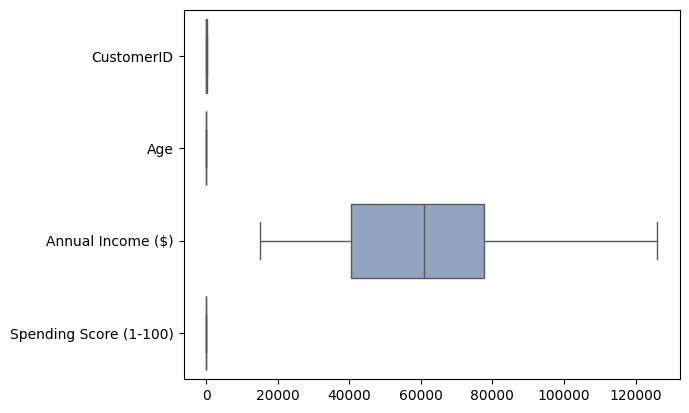

In [20]:
## Visualising post outliers removal
ax = sns.boxplot(data=data1, orient="h", palette="Set2")

##**Data Scaling**

(array([[  0.,  24.,  16.,  34.,  38.,  30.,  36.,   8.,   8.,   4.],
        [198.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([1.000000e+00, 1.260090e+04, 2.520080e+04, 3.780070e+04,
        5.040060e+04, 6.300050e+04, 7.560040e+04, 8.820030e+04,
        1.008002e+05, 1.134001e+05, 1.260000e+05]),
 <a list of 2 BarContainer objects>)

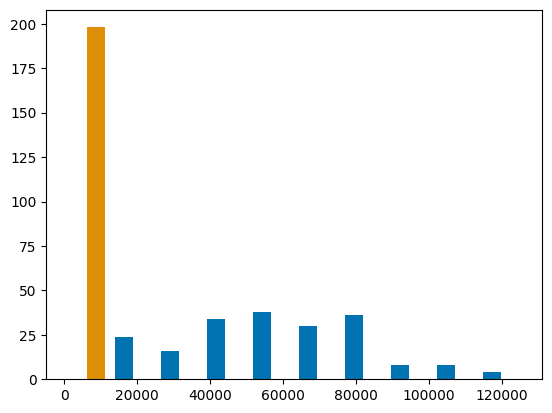

In [21]:
## Comparing pre and Post scaled data

## Pre-Scaled
plt.hist(data1[['Annual Income ($)','Spending Score (1-100)']])

In [22]:
## Data Scaling - Scaling Annual Income and Spending Score
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data1[['Annual Income ($)', 'Spending Score (1-100)']] = scaler.fit_transform(data1[['Annual Income ($)', 'Spending Score (1-100)']])

(array([[24., 16., 30., 22., 34., 38., 14., 14.,  2.,  4.],
        [16., 19., 10., 17., 35., 37., 11., 24., 13., 16.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

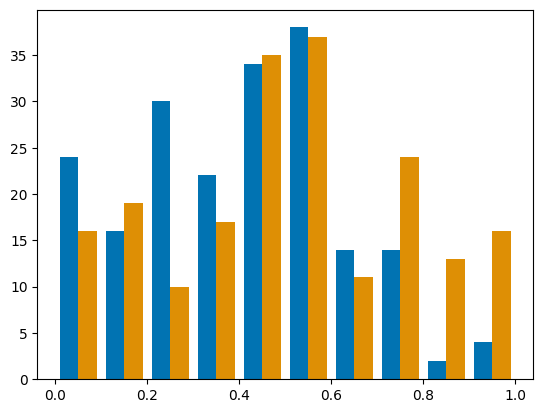

In [23]:
## Post-Scaled
plt.hist(data1[['Annual Income ($)','Spending Score (1-100)']])

In [24]:
data1.drop(['Gender'], axis=1, inplace=True)
data1.drop(['Age'], axis=1, inplace=True)
print(data1.head())

   CustomerID  Annual Income ($)  Spending Score (1-100)
0           1           0.000000                0.387755
1           2           0.000000                0.816327
2           3           0.009009                0.051020
3           4           0.009009                0.775510
4           5           0.018018                0.397959


# Different clustering algorithms

##**1 - KMeans Clustering**

### KMeans clustering with 2 clusters

## Identifying K value, the Optimal Number of Clusters

Text(0.5, 1.0, 'Elbow plot for optimal number of clusters')

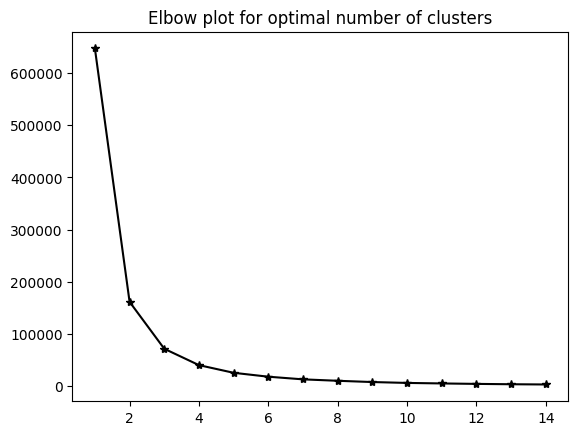

In [25]:
wscc = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init="k-means++",random_state=0)
    kmeans.fit(data1)
    wscc.append(kmeans.inertia_)

plt.plot(range(1,15),wscc,marker="*",c="black")
plt.title("Elbow plot for optimal number of clusters")

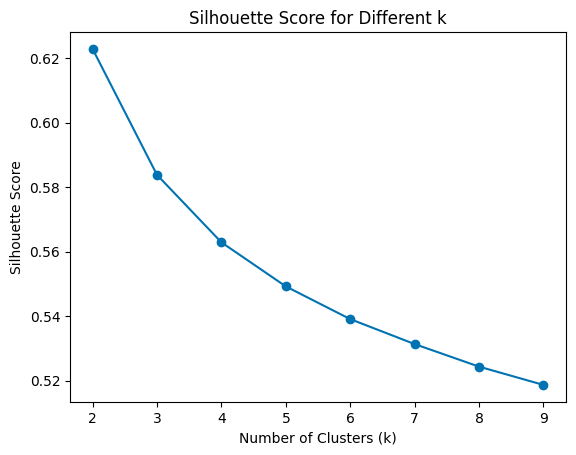

Best k: 2, Silhouette Score: 0.6229143391346604


In [26]:
## Using Silhouette Score to find the optimal K value

silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k,  random_state=42)
    kmeans.fit(data1)
    score = silhouette_score(data1, kmeans.labels_)
    silhouette_scores.append(score)

# Plot silhouette scores for different values of k
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.show()

# Select the k with the highest silhouette score
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Best k: {best_k}, Silhouette Score: {max(silhouette_scores)}")


Using both the methods we identify that the optimal number of clusters for our data is 2, i.e. K=2.

In [27]:
## Fitting the Clustering Algorithm
k_means = KMeans(n_clusters=2)
k_means.fit(data1)

KMeans(n_clusters=2)

In [28]:
## Cluster labels
labels_k=k_means.labels_
print(labels_k)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [29]:
## Count of data in each cluster label
print(np.unique(labels_k,return_counts=True))


(array([0, 1], dtype=int32), array([100,  98]))


In [30]:
## Cluster centroids
centers_k = k_means.cluster_centers_
print(centers_k)

[[148.5          0.58594595   0.50377551]
 [ 49.5          0.21731936   0.50020825]]


### Clustering Performance

In [31]:
## Computing Silhoutte score
score_km = metrics.silhouette_score(data1, labels_k)
print("Score = ", score)

Score =  0.518677159782965


In [32]:
## Computing Silhouette coefficient for each sample in a dataset
score_kmm = metrics.silhouette_samples(data1, labels_k, metric='euclidean')
print("Score = ", score_kmm)

Score =  [ 0.66777571  0.67223628  0.6766165   0.68097053  0.68523115  0.68936737
  0.69339832  0.69736945  0.70126002  0.70510455  0.70878566  0.71235324
  0.71590078  0.71932463  0.72260969  0.72582688  0.72894026  0.73192013
  0.73477219  0.7374614   0.74016041  0.74265935  0.74499214  0.74729817
  0.74940421  0.75140519  0.75329603  0.75502117  0.75658284  0.75795757
  0.7592083   0.76038006  0.76128469  0.76208479  0.76274232  0.76321319
  0.76349473  0.76362     0.7635324   0.76325696  0.76279306  0.76205664
  0.76123466  0.76014495  0.75880641  0.75727524  0.75550573  0.75348551
  0.75121406  0.74868892  0.74590327  0.74283985  0.73950342  0.73587055
  0.73194644  0.72770944  0.72316069  0.71827891  0.71305863  0.70748574
  0.70155111  0.69524165  0.6885429   0.68143849  0.67392216  0.66596846
  0.65757242  0.64870808  0.63935882  0.62951464  0.61914702  0.60823655
  0.59677087  0.58471491  0.57205127  0.55875521  0.54479885  0.53015372
  0.51479021  0.49867376  0.48178168  0.46

### Visualising the Clusters

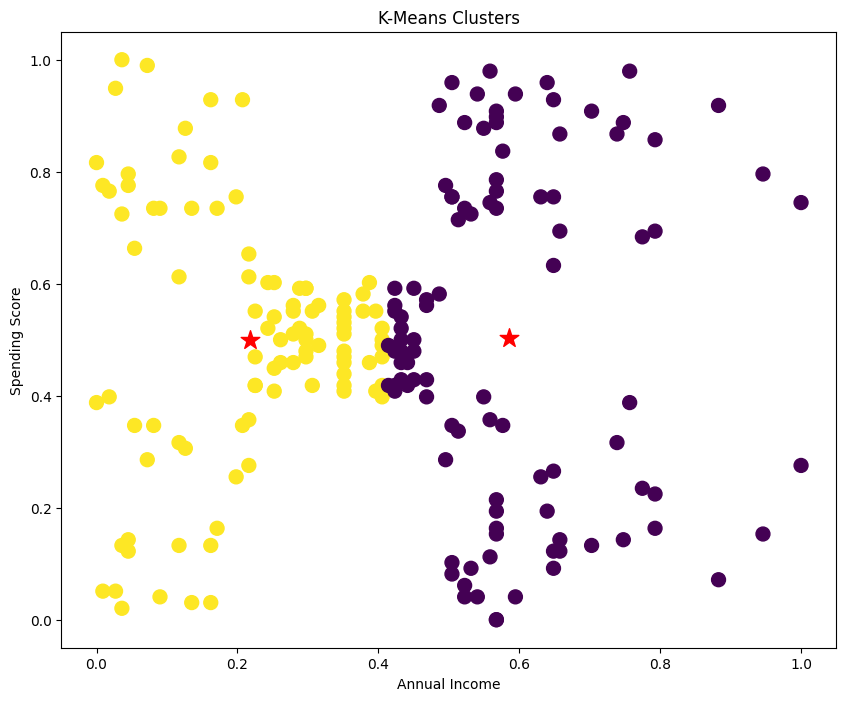

In [33]:
plt.figure(figsize=(10, 8))

plt.scatter(data1['Annual Income ($)'],
            data1['Spending Score (1-100)'],
            c=labels_k, s=100)

plt.scatter(centers_k[:,1], centers_k[:,2], color='red', marker='*', s=198)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means Clusters')

plt.show()

#Strengths -
K-Means is scalable and computationally efficient which makes it a good option for future scalability of the mall customers data as the number of customers increase.
Also, it is simple to implement and requires less number of iterations to identify the optimal solution.
Moreover, as we increase the scope and compare three variables at a time for clustering, the clusters are not linearly separable, this clustering algorith works well in grouping customer clusters in 3 dimensional space.


#Weakness -
KMeans algorithm requires us to specify the number of clusters to be able to apply the algorithm. So, a non-optimal value of K will lead to non-optimal clusters.
Also, as the algorithm involves determination of cluster centroids, any outliers in the data can impact the position of centroids and thereby the clusters. In the current use case, this should not be a problem as we have removed the outliers. But it can pose a problem for future use cases.

Finally, K-Means assumes that all the clusters have the same variance and size, which is not true in our use case as we have clusters of varying sizes and shapes.


##**2 - Hierarchical clustering Dendogram**

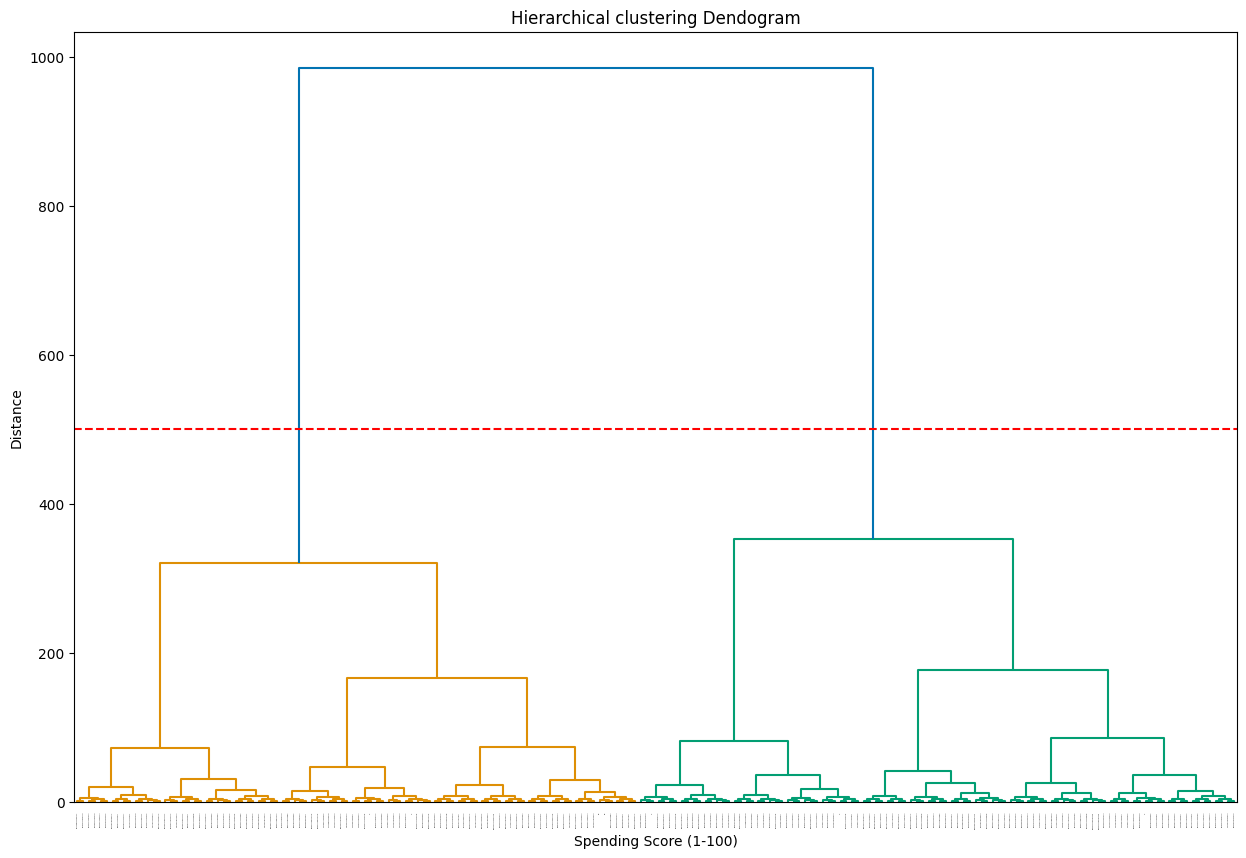

In [34]:
## Defining the function for Hierarchical clustering
linkage_matrix=linkage(data1,method='ward',metric="euclidean")

## Plotting the Dendogram
plt.figure(figsize=(15,10))
d_ward = dendrogram(linkage_matrix,labels=data1['Spending Score (1-100)'].values, leaf_rotation=90, leaf_font_size=1)
plt.title("Hierarchical clustering Dendogram")
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Distance')
#Plot a horizontal line indicating the clustering point
plt.axhline(y=500, color='r', linestyle='--')
plt.show()

As per K-Means we get 2 as optimal K value. In this algorithm we want to have the same k value,i.e. 2 clusters in our data so we will cut the Dendogram accordingly.

In [35]:
num_clusters = 2
#Add cluster membership to the original data
cluster_labels_h = cut_tree(linkage_matrix, n_clusters=num_clusters).flatten()
print(cluster_labels_h )

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


### Clustering Performance

In [36]:
score_h = metrics.silhouette_score(data1, cluster_labels_h )

print("Score Hierarchical clustering = ", score_h)

Score Hierarchical clustering =  0.622324362128842


In [37]:
## Computing Silhouette coefficient for each sample in a dataset
score_hh = metrics.silhouette_samples(data1, cluster_labels_h , metric='euclidean')
print("Scores Hierarchical clustering= ", score_hh)

Scores Hierarchical clustering=  [ 0.65884311  0.6631871   0.667456    0.67170087  0.67585829  0.67989853
  0.68384015  0.68772593  0.6915368   0.69530503  0.69891963  0.70242754
  0.70591837  0.70929293  0.71253759  0.71571922  0.71880431  0.72176427
  0.72460499  0.72729273  0.72999231  0.73250376  0.73486     0.73719288
  0.73933864  0.74138689  0.74333353  0.74512546  0.74676531  0.74823049
  0.74958151  0.75086045  0.75188964  0.75282278  0.75362483  0.75425317
  0.75470636  0.75501511  0.75512673  0.75506436  0.75482848  0.75433862
  0.7537735   0.75295953  0.75191566  0.75069481  0.74925453  0.74758314
  0.74568048  0.74354457  0.74116931  0.73853871  0.73565784  0.73250472
  0.72908499  0.72537837  0.72138652  0.7170899   0.71248384  0.70755565
  0.70229717  0.69669692  0.69074187  0.68441712  0.67771794  0.67062068
  0.66312202  0.65519807  0.64683408  0.63802227  0.62873624  0.61895947
  0.60868121  0.59786991  0.58651115  0.57458252  0.56206005  0.5489187
  0.53513239  0.520

### Visualising the Clusters

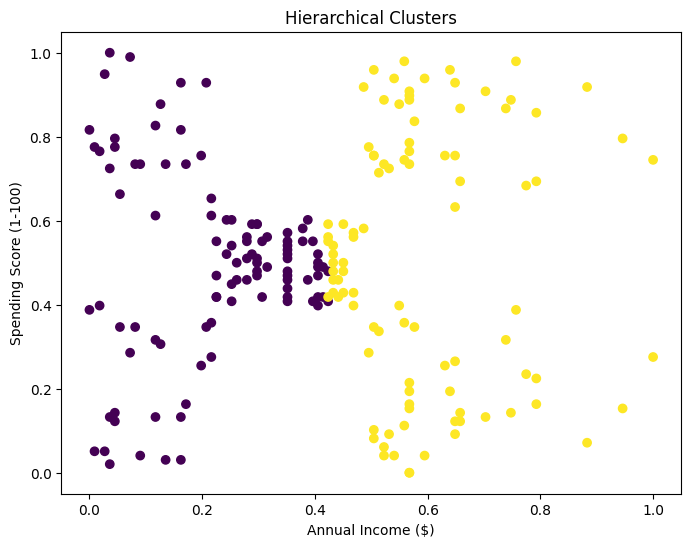

In [38]:
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data1['Annual Income ($)'], data1['Spending Score (1-100)'], c=cluster_labels_h, cmap='viridis', marker='o')
plt.title('Hierarchical Clusters')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.show()

#Strengths -
Unlike KMeans, here we do not have to specify the value of K, instead we can cut the dendogram at our desired number of clusters
Also, this methods provides a better understanding on the data structure as a dendogram provides a visual represntation on the formation of clusters and how they are grouped within the dataset.
#Weakness -
This algorithm is computationally intensive and inefficient for large dataset unlike KMeans. In the current use case it is not a problem as we just have 200 data points.
Moreover, similar to KMeans this method is also sensitive to outliers. Presence of outliers can impact the shape and distribution of the data and thereby the number of clusters.

##**3 - BIRCH**

Given this method computes the clusters depending on the algorithm parameters, therefore we perform hyperparameter tuning to find the optimal parameters to optimise model accuracy.

In [39]:
## Hyperparameter Tuning to find optimal parameter values
k_fold = KFold(n_splits=3, shuffle=True, random_state=43)

hyperparams = { "branching_factor": [50,100,200],
                "n_clusters": [2,4,5,6,7,9],
                "threshold": [0.02,0.06,0.09,0.14,0.3]}

# Defining the scoring metrics
def sil_score(estimator, X):
    labels = estimator.predict(X)
    score = metrics.silhouette_score(X, labels)
    return score

ensemble = GridSearchCV(estimator=Birch(),param_grid=hyperparams,scoring=sil_score,cv=k_fold,verbose=10,n_jobs=-1)

ensemble.fit(data1)
best_estimator = ensemble.best_estimator_

# Print the best hyperparameters found
print(ensemble.best_params_)


Fitting 3 folds for each of 90 candidates, totalling 270 fits
{'branching_factor': 50, 'n_clusters': 2, 'threshold': 0.02}


In [40]:
## Applying the clustering algorithm basis the optimal parameters
model_br = Birch(branching_factor= 50, n_clusters= 2, threshold = 0.02)
model_br.fit(data1)
yhat_br = model_br.predict(data1)
clusters_br = unique(yhat_br)
print("Clusters of Birch",clusters_br)
labels_br = model_br.labels_


Clusters of Birch [0 1]


### Clustering Performance

In [41]:
score_br = metrics.silhouette_score(data1,labels_br)

print("Score of Birch = ", score_br)

Score of Birch =  0.622324362128842


In [42]:
## Computing Silhouette coefficient for each sample in a dataset
score_brr = metrics.silhouette_samples(data1, cluster_labels_h , metric='euclidean')
print("Scores Birch clustering= ", score_brr)

Scores Birch clustering=  [ 0.65884311  0.6631871   0.667456    0.67170087  0.67585829  0.67989853
  0.68384015  0.68772593  0.6915368   0.69530503  0.69891963  0.70242754
  0.70591837  0.70929293  0.71253759  0.71571922  0.71880431  0.72176427
  0.72460499  0.72729273  0.72999231  0.73250376  0.73486     0.73719288
  0.73933864  0.74138689  0.74333353  0.74512546  0.74676531  0.74823049
  0.74958151  0.75086045  0.75188964  0.75282278  0.75362483  0.75425317
  0.75470636  0.75501511  0.75512673  0.75506436  0.75482848  0.75433862
  0.7537735   0.75295953  0.75191566  0.75069481  0.74925453  0.74758314
  0.74568048  0.74354457  0.74116931  0.73853871  0.73565784  0.73250472
  0.72908499  0.72537837  0.72138652  0.7170899   0.71248384  0.70755565
  0.70229717  0.69669692  0.69074187  0.68441712  0.67771794  0.67062068
  0.66312202  0.65519807  0.64683408  0.63802227  0.62873624  0.61895947
  0.60868121  0.59786991  0.58651115  0.57458252  0.56206005  0.5489187
  0.53513239  0.52067113  

### Visualising the Clusters

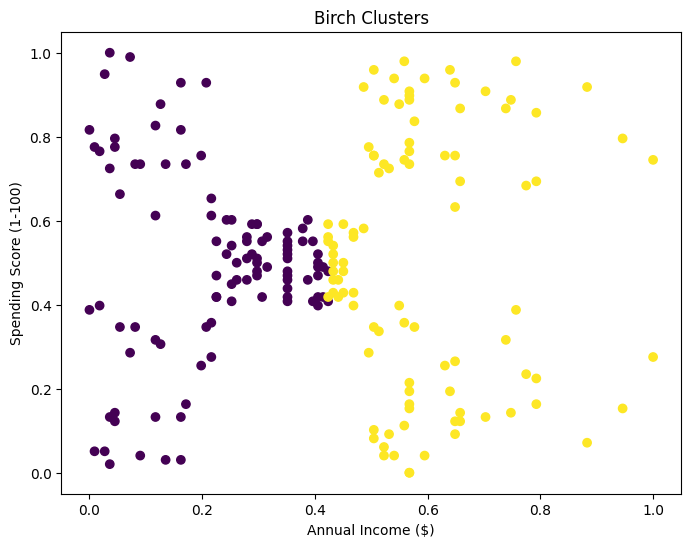

In [43]:
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data1['Annual Income ($)'], data1['Spending Score (1-100)'], c=labels_br, cmap='viridis', marker='o')
plt.title('Birch Clusters')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.show()

#Strengths -
This method is computationally efficient and fast. Therefore it takes less time than hierarchical clustering. Though in the current use case it is not a concern as we are dealing with a small dataset, but for future scalability it makes more sense to use this clustering algorithm.
#Weakness -
To algorithm requires the parameters(branching factor and the threshold for clustering) BIRCH to be tuned. A non-optimal values of these parameters can lead to incorrect clusters.
As this method is built for large datasets it may not perform well for small or sparsed datasets.

##**4 - Affinity Propagation**

We perform hyperparameter Tuning for Affinity as the performance of the algorithm is highly dependent of the parameters, given we do not specify the K value here.

In [44]:
## Hyperparameter Tuning to find optimal parameter values
param_grid = {
    'damping': [0.5, 0.6, 0.7, 0.8, 0.9],
    'convergence_iter': [5, 10, 15]}
k_fold = KFold(n_splits=3, shuffle=True, random_state=43)

# Defining the scoring metrics
def sil_score(estimator, X):
    labels = estimator.predict(X)
    score = metrics.silhouette_score(X, labels)
    return score

ensemble_AP = GridSearchCV(estimator=AffinityPropagation(),param_grid=param_grid,scoring=sil_score,cv=k_fold,verbose=10,n_jobs=-1)
ensemble_AP.fit(data1)

# Print the best hyperparameters found
print("Best hyperparameters found: ", ensemble_AP.best_params_)



Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best hyperparameters found:  {'convergence_iter': 5, 'damping': 0.9}


In [45]:
## Applying the clustering algorithm basis the optimal parameters
model_aff = AffinityPropagation(convergence_iter= 5, damping=0.9)
model_aff.fit(data1)
#
yhat_aff = model_aff.predict(data1)
clusters_aff = unique(yhat_aff)
print("Clusters of Affinity Prop.",clusters_aff)
labels_aff = model_aff.labels_
centroids_aff = model_aff.cluster_centers_

Clusters of Affinity Prop. [0 1]


### Clustering Performance

In [46]:
score_aff = metrics.silhouette_score(data1,labels_aff)
print("Score of Affinity Propagation = ", score_aff)

Score of Affinity Propagation =  0.6229143391346604


In [47]:
## Computing Silhouette coefficient for each sample in a dataset
score_afffs = metrics.silhouette_samples(data1, cluster_labels_h , metric='euclidean')
print("Scores Affinity Propagation clustering= ", score_afffs)

Scores Affinity Propagation clustering=  [ 0.65884311  0.6631871   0.667456    0.67170087  0.67585829  0.67989853
  0.68384015  0.68772593  0.6915368   0.69530503  0.69891963  0.70242754
  0.70591837  0.70929293  0.71253759  0.71571922  0.71880431  0.72176427
  0.72460499  0.72729273  0.72999231  0.73250376  0.73486     0.73719288
  0.73933864  0.74138689  0.74333353  0.74512546  0.74676531  0.74823049
  0.74958151  0.75086045  0.75188964  0.75282278  0.75362483  0.75425317
  0.75470636  0.75501511  0.75512673  0.75506436  0.75482848  0.75433862
  0.7537735   0.75295953  0.75191566  0.75069481  0.74925453  0.74758314
  0.74568048  0.74354457  0.74116931  0.73853871  0.73565784  0.73250472
  0.72908499  0.72537837  0.72138652  0.7170899   0.71248384  0.70755565
  0.70229717  0.69669692  0.69074187  0.68441712  0.67771794  0.67062068
  0.66312202  0.65519807  0.64683408  0.63802227  0.62873624  0.61895947
  0.60868121  0.59786991  0.58651115  0.57458252  0.56206005  0.5489187
  0.5351323

### Visualising the Clusters

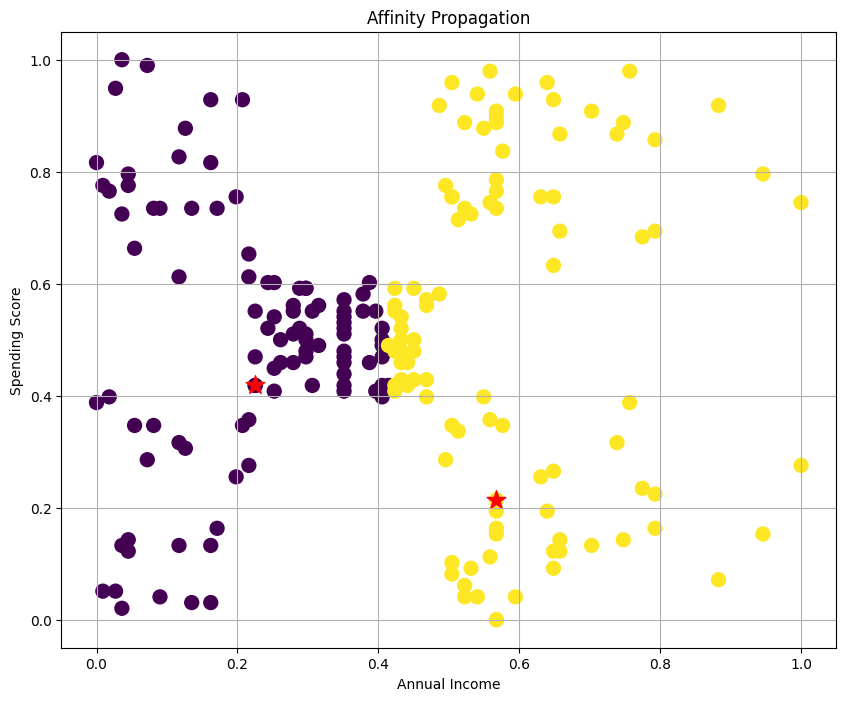

In [48]:
plt.figure(figsize=(10, 8))

plt.scatter(data1['Annual Income ($)'],
            data1['Spending Score (1-100)'],
            c=labels_aff, s=100)

plt.scatter(centroids_aff[:,1], centroids_aff[:,2], color='red', marker='*', s=198)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Affinity Propagation')
plt.grid()
plt.show()

###Strengths -
 In this method we do not have to specify the number of clusters beforehand, unlike in K-Means. The number of clusters are determined basis the data, which reduces the chances of identifying incorrect clusters.
 Also, this method can handle clusters with complex shapes, given it is based on pairwise similarities instead of the  distances. Therefore, it makes sense to use this algorithm in the current use case.
###Weakness -
This method is computational intesive, unlike K-Means and BIRCH, so is not scalable for large datasets.
Moreover, as the choice of input parameter values determine the number of clusters. Un-optimal parameter values can lead to incorrect clusters.

## Findings and propose potential applications

We obsered that all the 4 methods provide similar results and similar accuracy of around 62%. In case we do not want to provide the value of K, then we should use BIRCH or Affinity Propogation.


The custering algorithm divides the customers into 2 clusters basis the Annual Income and Customer Score. These clusters can be used to target customers accordingly to avoid the churn. Customers with High Income and High Customer score can be prioritised over the customers with Low Income and Low Score. The customers can be targetted with different marketing stratgies and product discounts accordingly.

## Further Steps - Future Scope

1. Considering other variables for clustering. A part of the current analysis we haven't considered Age and Gender as part of the cluster analysis, but these can be added in the future scope.

2. We can also do Feature Engineering, for instance creating Grouped variables for income - make 10 groups for Annual income, less than 10000, between 10000 to 20000 and so on.

2. Explore other clustering algorithms like DBSCAN, K-Means ++, Mean Shift Clustering, Gaussian Mixture Model etc..